# MRA*

### base imports and tuning

In [9]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter1d

plt.rcParams['figure.figsize'] = [15, 5]
EPS = 0.000001

In [10]:
import sys
import os

search_tools_path = os.path.join(os.getcwd(), 'search_tools')
if search_tools_path not in sys.path:
    sys.path.append(search_tools_path)

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### pipeline

In [12]:
from moving_ai.mai_map_reader import MaiReader, MaiMaps
from pipeline import Pipeline
from moving_ai.mai_map_visualizer import VisualizeMaiMap, VisualizeMaiMapGif

from algorithms.astar_heuristics import diagonal_dist
from algorithms.mrastar import MRAstar
from algorithms.wastar import WAstar
from algorithms.astar import Astar
from algorithms.rstar import Rstar

In [13]:
def init_map_reader():
    map_reader_0 = MaiReader(MaiMaps.ARENA)
    selected_task_callback = lambda t: t.start_c == (4, 32) and t.goal_c == (47, 19)
    selected_task = filter(selected_task_callback, map_reader_0.read_tasks()).__next__()
    return map_reader_0.with_task(selected_task)

map_reader = init_map_reader()

In [14]:
from processors.plot_expanded_and_actual_length_ratio import PlotExpandedAndActualLengthRatio
from processors.plot_success_rate import PlotSuccessRate
from processors.plot_mean_expanded import PlotMeanExpanded


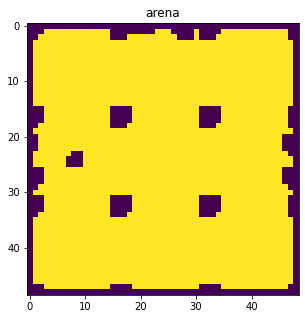

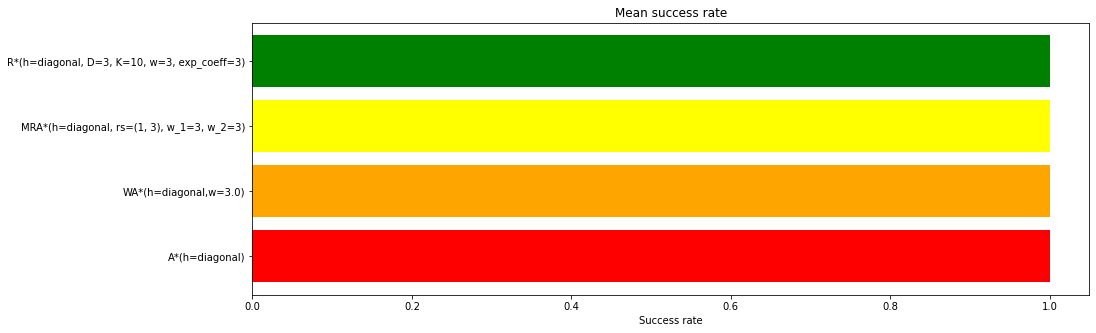

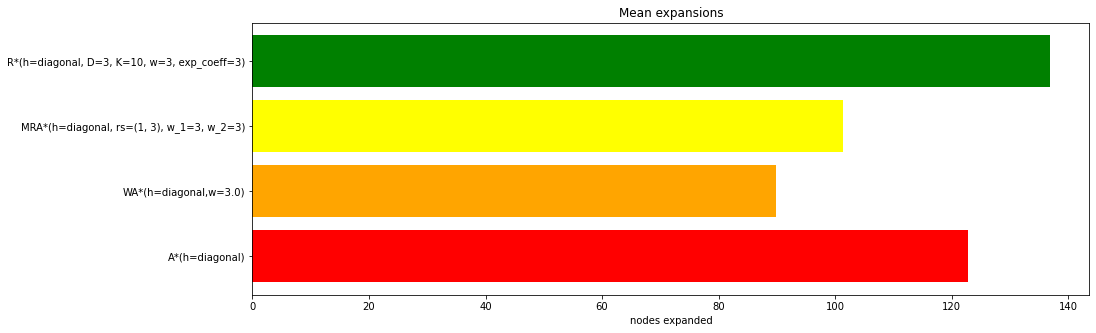

In [15]:
map = MaiMaps.ARENA
algorithms = [
    Astar(diagonal_dist),
    WAstar(diagonal_dist, 3),
    MRAstar(diagonal_dist, resolutions=(1, 3), w_1=3, w_2=3),
    Rstar(diagonal_dist, D=3, K=10, w=3, exp_coeff=3)
]
MaiReader(map).read_map().draw(map)

p = Pipeline(
    reader=MaiReader(map),
    algorithms=algorithms,
    processor=PlotSuccessRate().then(PlotMeanExpanded()),
    timelimit=5
)

p.run()

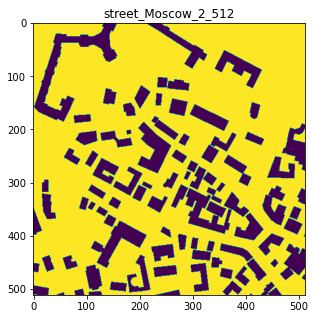

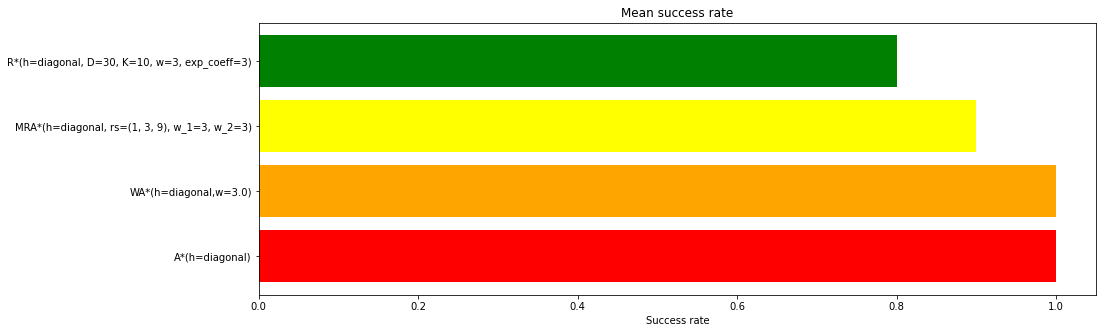

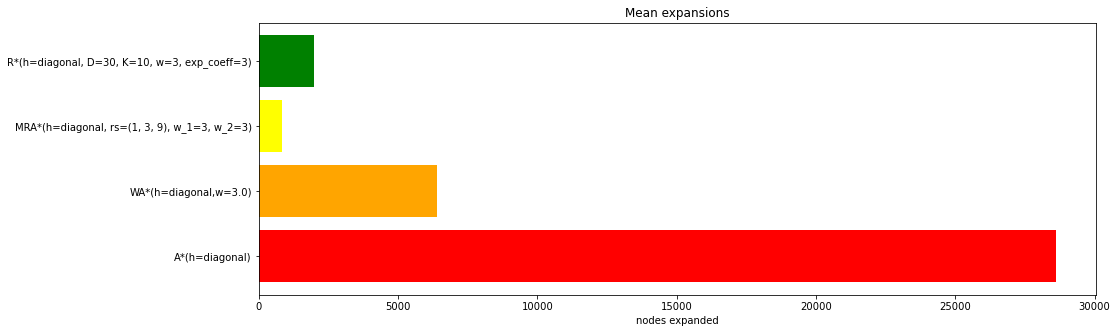

In [16]:
map = MaiMaps.MOSCOW
algorithms = [
    Astar(diagonal_dist),
    WAstar(diagonal_dist, 3),
    MRAstar(diagonal_dist, resolutions=(1, 3, 9), w_1=3, w_2=3),
    Rstar(diagonal_dist, D=30, K=10, w=3, exp_coeff=3)
]

MaiReader(map).read_map().draw(map)

p = Pipeline(
    reader=MaiReader(map, 10),
    algorithms=algorithms,
    processor=PlotSuccessRate().then(PlotMeanExpanded()),
    timelimit=10
)

p.run()

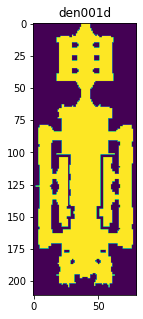

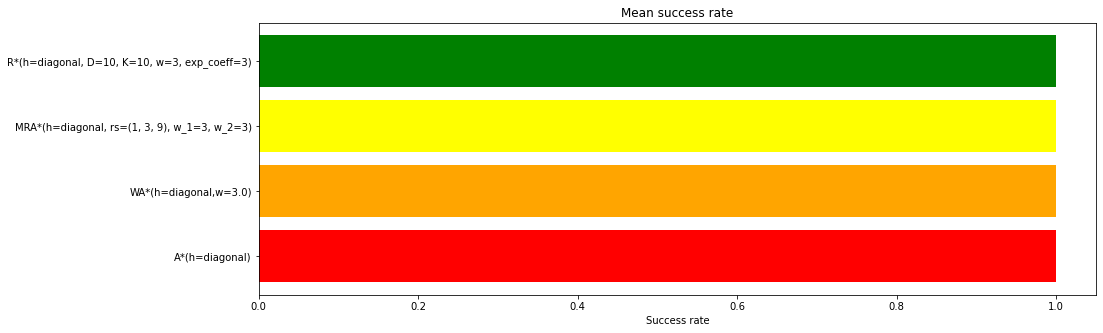

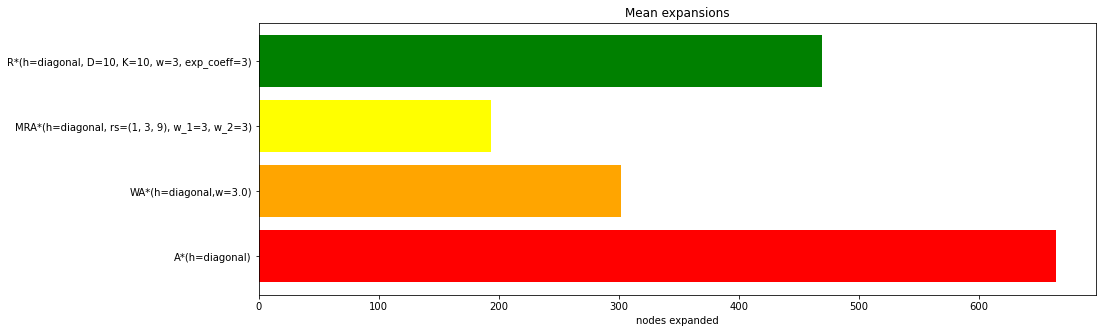

In [17]:
map = MaiMaps.DEN001D
algorithms = [
    Astar(diagonal_dist),
    WAstar(diagonal_dist, 3),
    MRAstar(diagonal_dist, resolutions=(1, 3, 9), w_1=3, w_2=3),
    Rstar(diagonal_dist, D=10, K=10, w=3, exp_coeff=3)
]

MaiReader(map).read_map().draw(map)

p = Pipeline(
    reader=MaiReader(map, 10),
    algorithms=algorithms,
    processor=PlotSuccessRate().then(PlotMeanExpanded()),
    timelimit=10
)

p.run()

